# Bank Customer Churn Model

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [2]:
df = pd.read_csv("D:\Customer_Churn_Analysis\Churn_Modelling.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\poulo\AppData\Local\Temp\ipykernel_2304\3303697090.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Customer_Churn_Analysis\Churn_Modelling.csv")


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Analysis

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df = df.set_index("CustomerId")

In [9]:
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [10]:
df = df.drop(columns = ["RowNumber"])

In [11]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


### Data Encoding

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace = True)

C:\Users\poulo\AppData\Local\Temp\ipykernel_2304\1747010795.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace = True)


In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace = True)

C:\Users\poulo\AppData\Local\Temp\ipykernel_2304\2663789401.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':1,'Male':0}},inplace = True)


In [16]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [17]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace = True)

In [18]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [19]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [20]:
df.loc[(df['Balance'] == 0),'Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [21]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

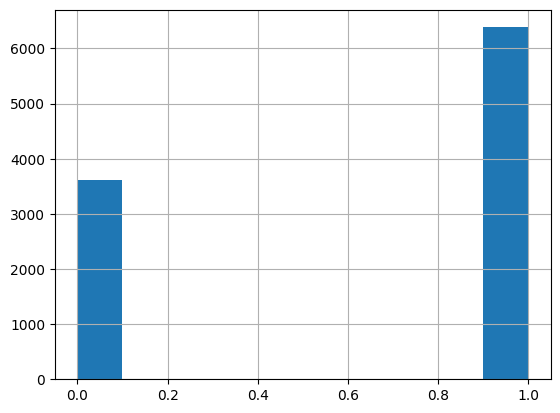

In [22]:
df['Zero Balance'].hist()

In [23]:
df.groupby(['Exited','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Exited Geography                                                        
0      0             2064         2064    2064  2064    2064     2064   
       1             1695         1695    1695  1695    1695     1695   
       2             4204         4204    4204  4204    4204     4204   
1      0              413          413     413   413     413      413   
       1              814          814     814   814     814      814   
       2              810          810     810   810     810      810   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Exited Geography                                                              
0      0                   2064       2064            2064             2064   
       1                   1695       1695            1695             1695   
       2                   4204       4204            4204             4204   
1      0                    413        413             413              413   
       1                    814        814             814              814   
       2                    810        810             810              810   

                  Zero Balance  
Exited Geography                
0      0                  2064  
       1                  1695  
       2                  4204  
1      0                   413  
       1                   814  
       2                   810

### Define Label and Features

In [24]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [25]:
x = df.drop(['Surname','Exited'],axis = 1)

In [26]:
y = df['Exited']

In [27]:
x.shape ,y.shape

((10000, 11), (10000,))

<Axes: xlabel='Exited', ylabel='count'>

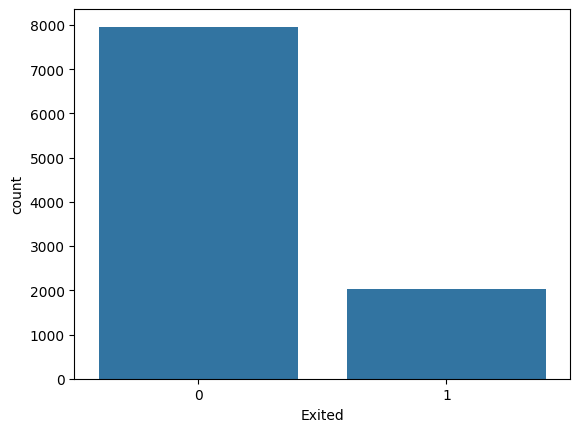

In [28]:
sns.countplot(x = 'Exited',data = df)

In [29]:
x.shape , y.shape

((10000, 11), (10000,))

### Random Under Sampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state = 2529)

In [32]:
x_rus , y_rus = rus.fit_resample(x,y)

In [33]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [35]:
y_rus.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

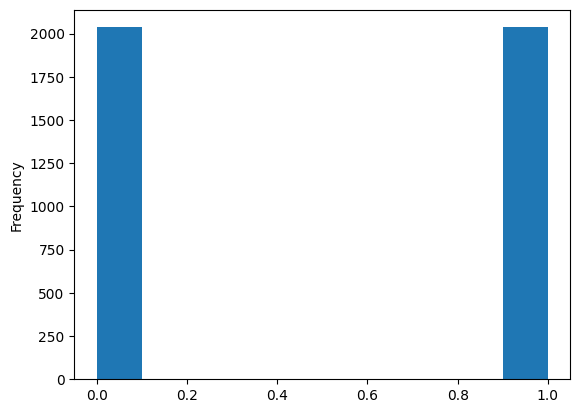

In [36]:
y_rus.plot(kind = 'hist')

### Random Over Sampling

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomUnderSampler(random_state = 2529)

In [39]:
x_ros , y_ros = ros.fit_resample(x,y)

In [40]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [41]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [42]:
y_ros.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

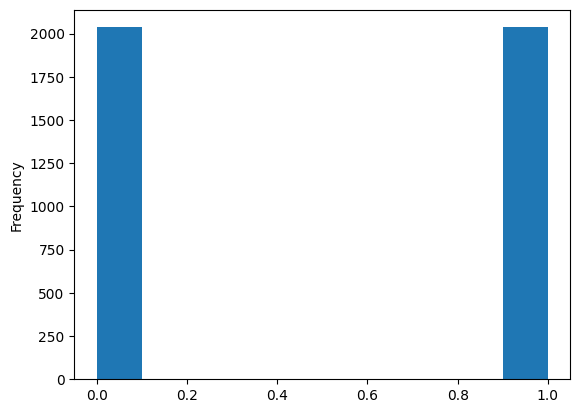

In [43]:
y_ros.plot(kind = 'hist')

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

### Split Original Data

In [45]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.3,random_state = 2529) 

### Split Random Under Sample Data

In [46]:
X_train_rus , X_test_rus , y_train_rus , y_test_rus = train_test_split(x_rus , y_rus , test_size = 0.3,random_state = 2529) 

### Split Random Over Sample Data

In [47]:
X_train_ros , X_test_ros , y_train_ros , y_test_ros = train_test_split(x_ros , y_ros , test_size = 0.3,random_state = 2529) 

## Standardize Features

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

### Standardize Original Data

In [50]:
X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [51]:
X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

### Standarize Random Under Sample Data

In [52]:
X_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [53]:
X_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

### Standarize Random Over Sample Data

In [54]:
X_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [55]:
X_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

## Support Vector Machine Classifier

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC()

In [58]:
svc.fit(X_train,y_train)

SVC()

In [59]:
y_pred = svc.predict(X_test)

### Model Accuracy Original Data

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



### Hyperparameter Tunning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'C' : [0.1,1,10],
             'gamma' : [1,0.1,0.01],
             'kernel' : ['rbf'],
             'class_weight': ['balanced']}

In [65]:
grid = GridSearchCV(SVC(),param_grid,refit = True , verbose = 2, cv = 2)

In [66]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [67]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [68]:
grid_predictions = grid.predict(X_test)

In [69]:
confusion_matrix(y_test , grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [70]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



## Model with Random Under Sampling

In [71]:
svc_rus = SVC()

In [72]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [73]:
y_pred_rus = svc_rus.predict(X_test_rus)

### Model Accuracy

In [74]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]], dtype=int64)

In [75]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



### Hyperparameter Tunning

In [76]:
param_grid_rus = {'C' : [0.1,1,10],
             'gamma' : [1,0.1,0.01],
             'kernel' : ['rbf'],
             'class_weight': ['balanced']}

In [77]:
grid_rus = GridSearchCV(SVC(),param_grid_rus,refit = True , verbose = 2, cv = 2)

In [78]:
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [79]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [80]:
grid_prediction_rus = grid_rus.predict(X_test_rus)

In [81]:
confusion_matrix(y_test_rus,grid_prediction_rus)

array([[476, 151],
       [172, 424]], dtype=int64)

In [82]:
print(classification_report(y_test_rus,grid_prediction_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



## Model with Random Over Sampling

In [83]:
svc_ros = SVC()

In [84]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [85]:
y_pred_ros = svc_ros.predict(X_test_ros)

### Model Accuracy

In [86]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[470, 157],
       [174, 422]], dtype=int64)

In [87]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



### Hyperparameter Tunning

In [88]:
param_grid_ros = {'C' : [0.1,1,10],
             'gamma' : [1,0.1,0.01],
             'kernel' : ['rbf'],
             'class_weight': ['balanced']}

In [89]:
grid_ros = GridSearchCV(SVC(),param_grid_ros,refit = True , verbose = 2, cv = 2)

In [90]:
grid_ros.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [91]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [92]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [93]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[611,  16],
       [105, 491]], dtype=int64)

In [94]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       627
           1       0.97      0.82      0.89       596

    accuracy                           0.90      1223
   macro avg       0.91      0.90      0.90      1223
weighted avg       0.91      0.90      0.90      1223



## Comparison

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [96]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [97]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [98]:
print(classification_report(y_test_rus,grid_prediction_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [99]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [100]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       627
           1       0.97      0.82      0.89       596

    accuracy                           0.90      1223
   macro avg       0.91      0.90      0.90      1223
weighted avg       0.91      0.90      0.90      1223

